# 차원 축소  
## 차원 축소(Dimension Reduction) 개요  
* 차원(피처)이 증가할수록  

    1) 데이터 포인트 간의 거리가 기하급수적으로 멀어짐.  
    2) 희소(sparse)한 구조를 가지게 됨.  
    3) 예측 신뢰도가 떨어짐.  
    4) 개별 피처 간에 상관관계가 높을 가능성이 큼. -> 선형 회귀의 경우 다중공선성의 문제.  
  
* 차원 축소  

    1) 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성.  
    2) 차원 축소를 통해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있음.  
    3) 차원 축소 방법으로는 피처 선택(feature selection)과 피처 추출(feature extraction)이 있음.  
    
        - 피처 선택 : 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고 데이터의 특정을 잘 나타내는 주요 피처만 선택하는 것.  
        - 피처 추출 : 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것.  
    4) 대표적인 차원 축소 알고리즘은 PCA, SVD NMF가 있음.  
    5) 이미지와 텍스트 데이터에서 차원 축소 알고리즘이 많이 사용됨.  
    
<br><br>
## PCA(Principa Component Analysis)  
### PCA 개요  
* PCA  

    1) PCA는 여러 변수에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Prinicipal Component)을 추출해 차원을 축소하는 기법.  
    2) PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소함. 이것이 PCA의 주성분이 됨. (분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주).  
    
        * 가장 큰 데이터 변동성(Variance)을 기반으로 첫번째 벡터 축 생성.  
        * 두번째 축은 첫번째 축에 직각이 되는 벡터를 축으로 함.  
        * 세번째 축은 두번째 축에 직각이 되는 벡터를 축으로 생성.  
        * 새롭게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소됨.  
  
<img src='https://upload.wikimedia.org/wikipedia/commons/1/15/GaussianScatterPCA.png'>  

* 선형변환, 공분산 행렬, 고유벡터  
    1) 선형변환 : 특정 벡터에 행렬 A를 곱해 새로운 벡터로 변환하는 것.  
    2) 분산 : 한 개의 특정한 변수의 데이터 변동.  
    3) 공분산 : 두 변수 간의 변동. 공분산 Cov(X, Y) > 0이면 X와 Y는 양의 상관관계임을 의미.  
    4) 고유벡터 : 행렬 A를 곱하더라도 방향이 변하지 않고 그 크기만 변하는 벡터.  
        
        Ax = ax, A -> 행렬, x -> 고유벡터, a -> 스칼라값.  
        
    5) 공분산 행렬은 정방행렬이며 대칭행렬임.  
    
        정방행렬 : 열과 행이 같은 행렬.  
        대칭행렬 : 정방행렬 중에서 대각 원소를 중심으로 원소값이 대칭되는 행렬.  
        
**입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 분해된 고유벡터(주성분)를 이용해 입력 데이터를 선형 변환하는 방식이 PCA임.**  

* PCA 스텝  
       
   1. 입력 데이터 세트의 공분산 행렬을 생성함.  
   2. 공분산 행렬이 고유벡터와 고유값을 계산함.  
   3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출함.(주성분 추출)    
   4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함.  
       
    

In [1]:
# 붓꽃 데이터셋의 4개의 피처를 PCA를 사용하여 2개의 차원으로 압축하기.
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환.
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


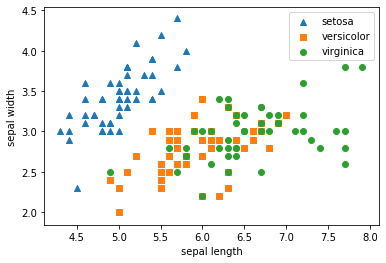

In [2]:
# sepal length와 sepal width를 X축, Y축으로 해 품종 데이터 분포 나타내기
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [4]:
# PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받음. 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환해야 함.
from sklearn.preprocessing import StandardScaler

# Target값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [9]:
# 스케일링이 적용된 데이터셋에 PCA를 적용해 2차원 PCA 데이터로 변환.
from sklearn.decomposition import PCA

# n_components는 PCA로 변환할 차원의 수를 의미함.
pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [10]:
# iris_pca는 변환된 PCA 데이터셋을 150X2 넘파이 행렬로 가지고 있음.
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
# numpy 행렬을 DataFrame으로 변환
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


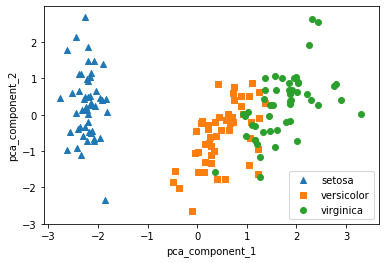

In [13]:
# 2차원으로 변환된 irisDF_pca를 시각화
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA로 차원축소된 데이터가 훨씬 더 품종을 잘 구분하고 있음을 확인할 수 있음.

In [14]:
# PCA Component별로 원본 데이터의 변동성을 얼마나 반영하는지 알아보기
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [17]:
# 원본 데이터셋에 랜덤 포레스트 적용하기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print("원본 데이터 교차 검증 개별 정확도 : ", scores)
print("원본 데이터 평균 정확도 : ", np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98039216 0.92156863 0.97916667]
원본 데이터 평균 정확도 :  0.960375816993464


C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
# PCA 변환한 데이터셋에 랜덤 포레스트 적용하기
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print("PCA 변환 데이터 교차 검증 개별 정확도 : ", scores_pca)
print("PCA 변환 데이터 교차 검증 평균 정확도 : ", np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도 :  [0.8627451  0.84313725 0.89583333]
PCA 변환 데이터 교차 검증 평균 정확도 :  0.8672385620915034


C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\eh063\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


좀 더 많은 피처를 가진 데이터 세트를 이용하여 PCA 변환 적용해보기  
[데이터셋 url] https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [19]:
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


[데이터셋 설명]

        1. 30,000개의 레코드와 24개의 속성.  
        2. Target값 : default payment next month, 다음달 연체 여부 의미. 연체일 경우 1, 정상납부는 0.  

In [22]:
# 컬럼명 변경
df.rename(columns={'PAY_0' : 'PAY_1', 'default payment next month' : 'default'}, inplace=True)
# y_target 변수 별도로 저장
y_target = df['default']
# 피처 데이터는 타겟변수를 제외한 칼럼으로 별도의 DataFrame 만듦.  
X_features = df.drop('default', axis=1)

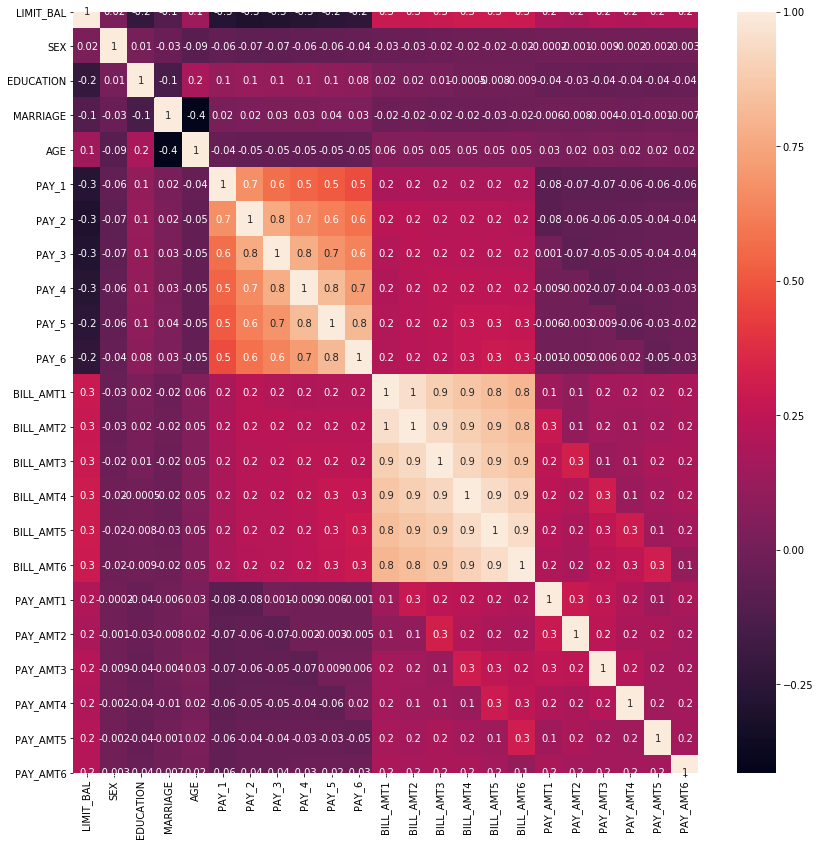

In [25]:
# DataFrame의 상관도 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14, 14))
# annot : 상관도 표시, fmt : 상관도의 형태(정수형, 실수형 등등)
sns.heatmap(corr, annot=True, fmt='.1g')

* BILL_AMT1~BILL_AMT6의 상관도가 매우 높음.  
* PAY_1~PAY_6도 상관도가 높은 편에 속함.  

In [26]:
# BILL_AMT1~BILL_AMT6 6개 속성을 2개의 컴포넌트로 PCA 변환함.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print("대상 속성명 : ", cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
# explained_variance_ratio_ : 개별 컴포넌트의 변동성 알아보기
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print("PCA Component별 변동성 : ", pca.explained_variance_ratio_)

대상 속성명 :  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성 :  [0.90555253 0.0509867 ]


In [27]:
# 원본 데이터 세트에 랜덤 포레스트 이용
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

print("CV=3인 경우의 개별 Fold세트별 정확도 : ", scores)
print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

CV=3인 경우의 개별 Fold세트별 정확도 :  [0.8083 0.8196 0.8232]
평균 정확도 : 0.8170


In [29]:
# PCA변환 후 랜덤 포레스트 적용
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터 세트에 먼저 StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 컴포넌트를 가진 PCA 변환을 수행하고 cross_val_score()로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print("CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도 : ", scores_pca)
print("PCA 변환 데이터 세트 평균 정확도 : {0:.4f}".format(np.mean(scores_pca)))

CV=3인 경우의 PCA 변환된 개별 Fold 세트별 정확도 :  [0.7909 0.7965 0.8021]
PCA 변환 데이터 세트 평균 정확도 : 0.7965


## LDA(Linear Discriminant Analysis)  
### LDA 개요  
* 선형 판별 분석법.  
* 입력 데이터 세트를 저차원 공간에 투영해 차원을 축소하는 기법.  
* 지도학습의 분류(Classifier)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소함.  
* 클래스 간 분산(between-class scatter)은 최대한 크게 가져가고, 클래스 내부의 분산(within-class scatter)은 최대한 작게 가져가는 방식.  
* LDA step  

        1. 클래스 내부와 클래스 간 분산 행렬을 구함. 이 두 개의 행렬은 입력 데이터의 결정값 클래스별로 개별 피처와 평균 벡터를 기반으로 구함.  
        2. 클래스 내부 분산 행렬과 클래스간 분산 행렬을 고유벡터로 분해함.  
        3. 고유값이 가장 큰 순으로 K개(LDA변환 차수만큼) 추출함.  
        4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환함.  
    
    <br>
    
### 붓꽃 데이터 세트에 LDA 적용하기

In [30]:
# LinearDiscriminantAnalysis : LDA를 제공하는 클래스
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [31]:
# 2개의 차원으로 붓꽃데이터를 LDA 변환.
# 비지도학습인 PCA와는 달리 LDA는 지도학습이므로 변환시 클래스의 결정값 필요함.  
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


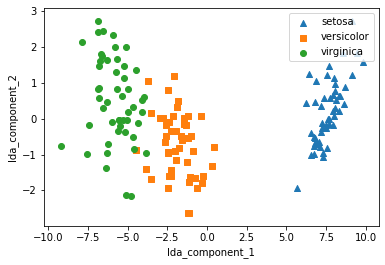

In [33]:
# LDA 변환된 입력 데이터를 2차원 평면에 품종별로 표현해 보기
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns = ['lda_component_1', 'lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda, columns=lda_columns)
irisDF_lda['target'] = iris.target

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']
    
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## SVD(Singular Value Decomposition)  
### SVD 개요  
* PCA의 경우 정방행렬(행과 열의 크기가 같은 행렬)만을 고유벡터로 분해할 수 있지만 SVD는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있음.  
* 특이값 분해로 불림.  
<img src='https://s3-us-west-2.amazonaws.com/articles-dimred/pca/svd.png'>  
* 하지만 일반적으로는 다음과 같이 SVD가 적용됨.  
<img src='https://res.cloudinary.com/practicaldev/image/fetch/s--yi33NPOc--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://raw.githubusercontent.com/adhiraiyan/DeepLearningWithTF2.0/master/notebooks/figures/fig0208a.png'>

In [34]:
# 넘파이의 SVD를 이용해 SVD 연산을 수행하고 SVD로 분해가 어떤 식으로 되는지 살펴보기
# 넘파이의 svd 모듈 임포트
import numpy as np
from numpy.linalg import svd

# 4X4 랜덤 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [36]:
# a 행렬에 SVD를 적용해 U, Sigma, Vt 도출하기
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("U matrix : \n", np.round(U, 3))
print("Sigma Value : \n", np.round(Sigma, 3))
print("V transpose matrix : \n", np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix : 
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value : 
 [3.423 2.023 0.463 0.079]
V transpose matrix : 
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [37]:
# U, Sigma, Vt를 이용해 다시 원본 행렬로 정확히 복원되는지 확인해 보기
# 다시 원본 행렬로 복원하기 위해서는 내적. But Sigma의 경우 0을 포함한 대칭행렬로 변환 후 내적.
# Sigma를 다시 0을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [38]:
# 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 차원 축소가 진행되는지 확인하기
# 일부러 의존성 부여함.
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [40]:
# 다시 SVD를 수행해 Sigma값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print("Sigma Value : \n", np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
Sigma Value : 
 [2.663 0.807 0.    0.   ]


Sigma값 중 2개가 0으로 변함. -> 선형 독립인 로우 벡터의 개수가 2개임.

In [41]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print((U_.shape, Sigma_.shape, Vt_.shape))
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

((4, 2), (2, 2), (2, 4))
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [42]:
# Truncated SVD를 이용해 행렬 분해하기
# Truncated SVD : Sigma 행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해 분해하는 방식.
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고 SVD를 적용할 경우 U, Sigma, Vt의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print("원본 행렬 : \n", matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print("\n분해 행렬 차원 : ", U.shape, Sigma.shape, Vt.shape)
print("\nSigma값 행렬 : ", Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print("\nTruncated SVD 분해 행렬 차원 : ", U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print("\nTruncated SVD Sigma값 행렬 : ", Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)    # output of TruncatedSVD

print("\nTruncated SVD로 분해 후 복원 행렬 : \n", matrix_tr)

원본 행렬 : 
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원 :  (6, 6) (6,) (6, 6)

Sigma값 행렬 :  [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원 :  (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬 :  [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬 : 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685

* 6 X 6 행렬을 SVD 분해하면 U, Sigma, Vt가 (6, 6), (6, ), (6, 6) 차원.  
* Truncated SVD의 n_components를 4로 설정하면 U, Sigma, Vt는 (6, 4), (4, ), (4, 6)로 각각 분해함.  
* Truncated SVD로 분해된 행렬을 다시 복원하면 완벽하게 복원되진 원본의 근삿값으로 복원됨.  
<br><br>

### 사이킷런 TruncatedSVD 클래스를 이용한 변환  

Text(0.5, 1.0, 'PCA')

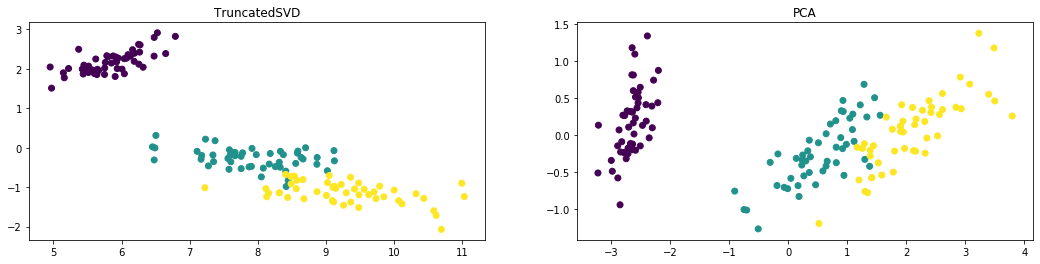

In [57]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data

# 2개의 주요 컴포넌트로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# 2개의 주요 컴포넌트로 PCA 변환
pca = PCA(n_components=2)
pca.fit(iris_ftrs)
iris_pca = pca.transform(iris_ftrs)

# 산점도 2차원으로 TruncatedSVD, PCA 변환된 데이터 표현. 품종은 색깔로 구분
fit, axs = plt.subplots(figsize=(18, 4), nrows=1, ncols=2)
axs[0].scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
axs[0].set_title("TruncatedSVD")

axs[1].scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
axs[1].set_title("PCA")

Text(0.5, 1.0, 'PCA Transformed')

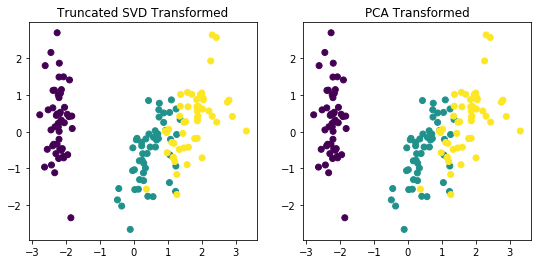

In [60]:
from sklearn.preprocessing import StandardScaler

# 붓꽃 데이터를 StandardScaler로 변환.
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA 변환 데이터는 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9, 4), ncols=2)
ax1.scatter(x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target)
ax2.scatter(x=iris_pca[:, 0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title("Truncated SVD Transformed")
ax2.set_title("PCA Transformed")

* 데이터가 스케일링 된 상태에서 PCA와 SVD변환이 서로 동일함을 알 수 있음. -> PCA가 SVD 알고리즘으로 구현됐음을 의미함.  
* PCA와 SVD의 차이점  
    **PCA는 밀집 행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능함.**  
    <br>
* SVD는 PCA와 유사하게 컴퓨터 비전 영역에서 이미지 압축을 통한 패턴 인식과 신호 처리 분야에서 사용됨.  

<br><br>

## NMF(Non-Negative Matrix Factorization)  
### NMF 개요  
<img src='https://t1.daumcdn.net/cfile/tistory/990F9B405A3923AF21'>  
* NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭함.  
* 분해 행렬 W : 원본 행에 대해 이 잠재 요소의 값이 얼마나 되는지 대응함.  
* 분해 행렬 H : 이 잠재 요소가 원본 열로 어떻게 구성됐는지 나타냄.  
* NMF 활용 

        1. 이미지 압축을 통한 패턴 인식.  
        2. 텍스트의 토픽 모델링 기법.  
        3. 문서 유사도 및 클러스터링.  
        4. 잠재 요소 기반의 추천 방식.

Text(0, 0.5, 'NMF Component 2')

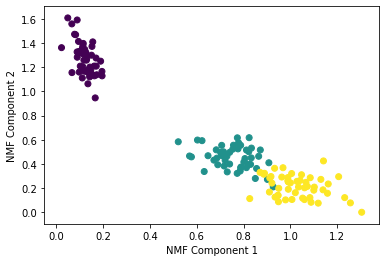

In [61]:
# 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 시각화하기
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target)
plt.xlabel("NMF Component 1")
plt.ylabel("NMF Component 2")